<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
    - Menentukan parameter k (jumlah tetangga paling dekat).
    - Menghitung jarak objek terhadap data training yang diberikan.
    - Mengurutkan hasil no 2 secara berurutan dari nilai tinggi ke rendah.
    - Mengumpulkan kategori Y (Klasifikasi nearest neighbor berdasarkan nilai k)
    - Dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat dipredisikan kategori objek.


2. Jelaskan minimal 2 kekurangan dari algoritma KNN?
    - Tidak menangani missing value secara implisit. Jika terdapat nilai hilang pada satu atau lebih variabel dari suatu instance, perhitungan jarak instance tersebut dengan instance lainnya menjadi tidak terdefinisi.
    - Rentan terhadap dimensionalitas yang tinggi. Hal ini karena semakin banyak dimensi, ruang yang bisa ditempati instance semakin besar, sehingga semakin besar pula kemungkinan bahwa nearest neighbour dari suatu instance sebetulnya sama sekali tidak “near“.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [6]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

uni_scores = {}
dis_scores = {}
uni_list = []
dis_list = []
k_range = range(2,21)

for k in k_range:
    knn_uni = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    knn_dis = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    
    knn_uni.fit(X_train, y_train)
    knn_dis.fit(X_train, y_train)
    
    y_pred = knn_uni.predict(X_test)
    uni_scores[k] = metrics.accuracy_score(y_test, y_pred)
    uni_list.append(uni_scores[k])
    
    y_pred = knn_dis.predict(X_test)
    dis_scores[k] = metrics.accuracy_score(y_test, y_pred)
    dis_list.append(dis_scores[k])

Uniform Scores :


[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance Scores :


[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

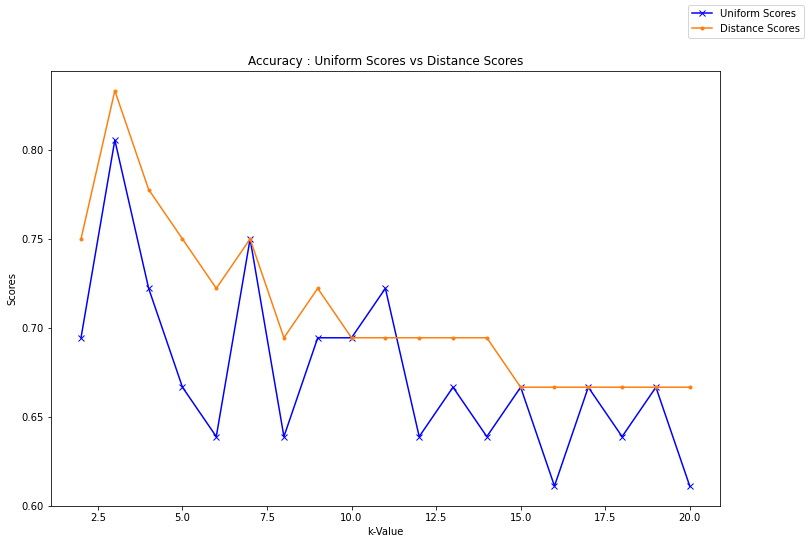

In [56]:
import matplotlib.pyplot as plt

print('Uniform Scores :') 
display(uni_list)

print('Distance Scores :') 
display(dis_list)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_range, uni_list, color = 'b', marker='x', label = 'Uniform Scores')
ax.plot(k_range, dis_list, color = 'C1', marker='.', label = 'Distance Scores')
ax.set_xlabel('k-Value')
ax.set_ylabel('Scores')
ax.title.set_text('Accuracy : Uniform Scores vs Distance Scores')
fig.legend()
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [62]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [61]:
from sklearn.linear_model import LinearRegression

m = LinearRegression(fit_intercept=True)
m.fit(X, y)

LinearRegression()

In [65]:
m.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [49]:
m.intercept_

0.5000000016247697